In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
x,y = make_blobs(n_samples=1000,centers=2,n_features=2,random_state=23)

In [3]:
x.shape

(1000, 2)

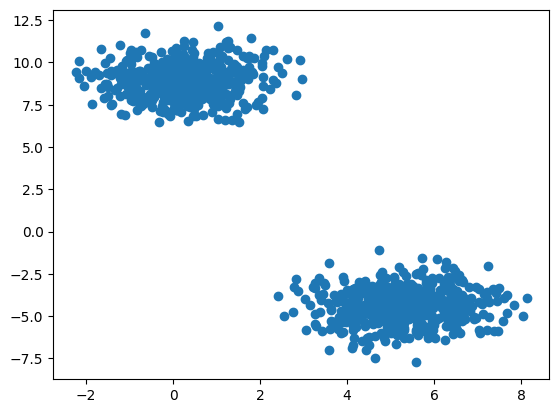

In [4]:
plt.scatter(x[:,0],x[:,1])

In [5]:
def kmeans_plus_plus(X,k):
    n_samples = X.shape
    centroids = [X[np.random.choice(range(n_samples))]]
    for _ in range(1,k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in X] )

        prob = dist_sq/dist_sq.sum()

        next_centroid = x[np.random.choice(range(n_samples),p = prob)]
        centroids.append(next_centroid)

    return np.array(centroids)

In [ ]:
def kmeans(X,k,max_iters = 300,tol = 1e-4):
    centroids = kmeans_plus_plus(X,k)
    for i in range(max_iters):
        clusters = np.argmin(np.linalg.norm(X[:,np.newaxis] - centroids,axis = 2),axis= 1)

        new_centroids  = np.array([x[clusters == j].mean(axis=0) for j in range(k)])
        /